# Supervised Machine Learning
### Artificial Intelligence 1, Week 7


### Learning models for **classification** or **regression** from a set of labelled instances.

# This week
Learning outcomes:

- Identify formulate and apply the basic processes of supervised machine learning
- Understand the role of data in estimating accuracy 

Videos:
- Basic model building process: train and test 
- Types of model: instance-based ( e.g. kNN) vs explicit (e.g. decision trees,rules, ...) 
- Example:   greedy rule induction as compared to expert system




# Machine Learning Paradigm
- Completely different paradigm to symbolic AI
- Create a system with the ability to learn
- Present the system with series of examples
- System builds up its own model of the world



<img src="figures/PersonThinkingAboutDogs.png">

<img src="figures/idealisedDog.png" style="float:right">

## Video (6:52): Hello World of Machine Learning Recipes


https://youtu.be/cKxRvEZd3Mw


## It's all about the data
- Computers cannot experience artefacts of the real world directly
- Instead they just deal with a few variables that represent them
- ML algorithms learn from a “training set” containing digital representations of examples to learn from
- Outcomes depend entirely on:
 - What you choose to measure
 - And how representative your training set is
 



## More formally

We have a set of *n* examples., and for each one  we have: 
- a value for each of *f* features 
- a label

The data set *X* is usually 2-D array of *n* rows and *f* columns.   
The label set *y* is usually a 1-D array with *n* entries.   
For now we'll assume the features are *continous* (e.g. floating point values)

If the label comes from a discrete unordered set of *m* values, e.g.  ("Orange","Apple" "Banana"): 
- we have a **Classification** problem.  
- We learn a model *M* that is a mapping from a *f*-dimensional continuous space (the feature values) onto a finite set
- *M*: R<sup>f</sup> --> \{1,...,m\}

If the label is an ordinal value (integer,    floating point):
- we have a **Regression** problem.
- *M*:R<sup>f</sup>->R

# The  Supervised Learning Workflow

<img src="figures/ML_workflow.png" style= "float:right">

This diagram assumes you are trying out more than one type of algorithm or choice of parameter settings

If you are just trying one algorithm you can skip the validation phase

### Example:  Iris flowers <img src="figures/Iris-image.png" style="float:right">
- Classic Machine Learning Data set
- 4 measurements: sepal and petal width and length
- 50 examples  from each 3 sub-species for iris flowers
- three class problem:
 - so for some types of algorithm have to decide whether to make  
   a 3-way classifier or nested 1-vs-rest classifers
- most ML classifiers can get over 90%




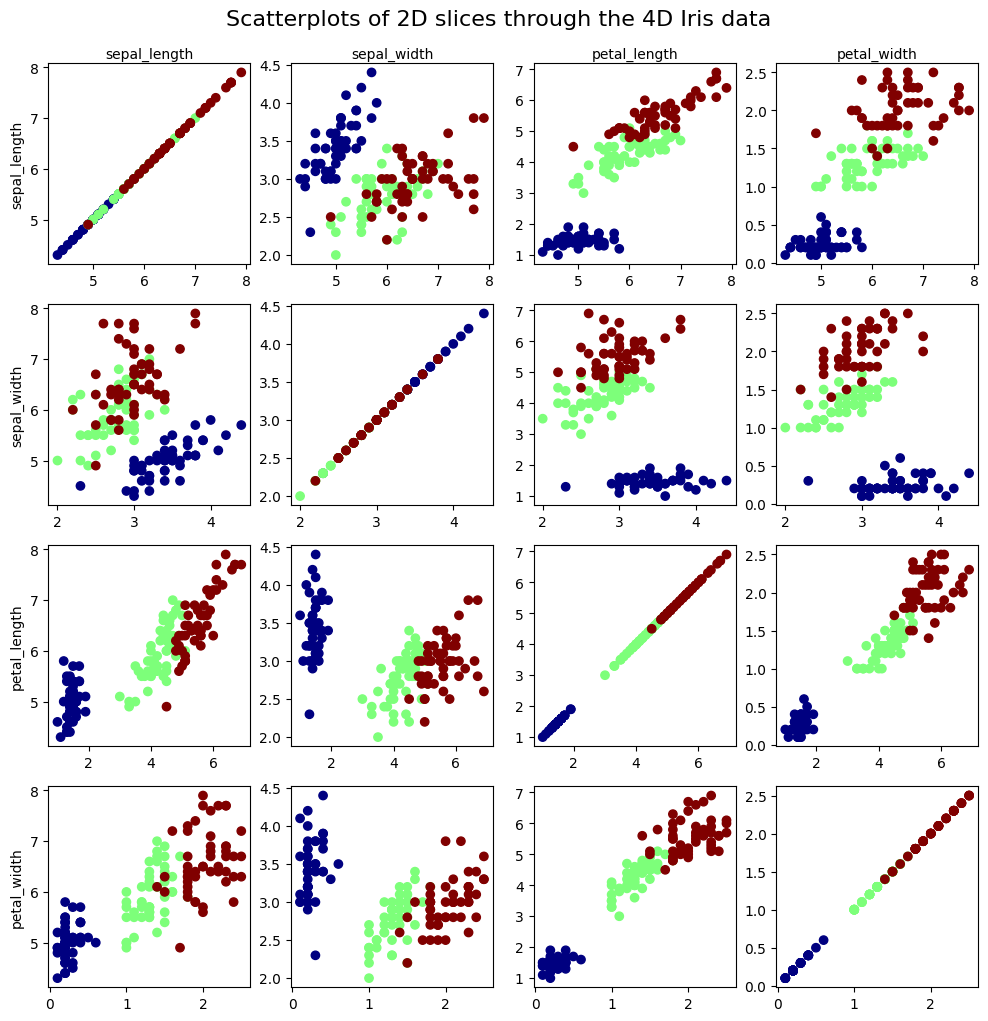

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import  week7_utils as W7utils
%matplotlib inline


irisX,irisy = sklearn.datasets.load_iris(return_X_y=True)
iris_features= ("sepal_length", "sepal_width", "petal_length", "petal_width")
iris_names= ['setosa','versicolor','virginica']
title="Scatterplots of 2D slices through the 4D Iris data"
W7utils.show_scatterplot_matrix(irisX,irisy,iris_features,title)

# Recap so far
Machine Learning is about learning patterns from data. In supervised ML this means:

**Training Data**: set of labelled examples, each characterised by values for *f* features  
**X**: data - usually a 2D array with one row per example, one column for each feature  
  (even images can be 'flattened' into this format).   
**y** : the labels/target 

A supervised Machine Learning **Algorithm**

A **performance criteria**: used to drive training and then estimate quality of model.  
Depending on the **context** this might be accuracy,  precision, recall,...


A **test set** to estimate the performance of the model on unseen data.  
If this is not available separately, have to take out some data from the training set
 - crude way; single 70:30 train:test split, making sure you preserve the proportions of different classes
 - better way: split data into ten
   - repeatedly train on 9/10 test on remaining 1/10, 
   - "headline" result is mean, but keep split results for statistical testing

## Important Idea!  Decision Surfaces
<img src="figures/decisionRegions.png" style="float:right" width=40%>

Each feature defines a dimension in *feature space*.

Each example has specific values for each feature
- so it occupies one point in feature space

The aim of our model is to let us predict labels for any item
- so it puts decision boundaries into that space to  
  divide it into regions

Symbolic Reasoning: 
- boundaries defined by our 'knowledge' 
- so can plot without needing data!

Machine Learning: 
- use the training data to **estimate** where the boundaries should be
- then plots model's prediction for lots of points over a grid  
  to find the decision surface and boundaries

## Machine Learning Algorithms
Typically a ML method consists of:

1: A  representation for the decision boundaries
 - Each different arrangement of boundaries defines a unique model
 - Each unique model is defined by the set of values for variables specifying where the boundaries are.
 - Different types of models will have different variables.
 
2: A learning algorithm to deciding how to change those variable values to move between models
 - last week we saw how the KMeans clustering algorirthm uses "local search with random restarts"

ML Algorithms build models in different ways
- but they don’t care what it is they are grouping
- and it is **meaningless** to say they “understand”.


## Some example ML methods
The field of ML is fast growing and contains many complex methods and representations
In this module I will just focus on a few simple ideas to give you a feel for what is out there.  
- Instance-based learning (k-Nearest Neighbours) - this week
- Decision trees and rule induction algorithms- this week
- Artificial Neural Networks - weeks 7 and 8

Next year: 
- Artificial Intelligence 2:  15 credits, semester 1 (AI and "General" pathways)
and in particular
- Machine Learning: 15 credits, semester 2     ( AI pathway)

will cover more algorithms in greater depth.


## Instance-based Methods: Nearest Neighbour Methods
- Do not explicitly represent class boundaries  
  Construct them “on-the-fly” when queried
- Store the set of training examples  
  More efficient methods may not store all points
- Use a metric to calculate distance between two points  
  e.g. Euclidean (continuous), Hamming (binary), ...

<img src="figures/kNN-steps.png">

## K-Nearest Neighbour Classification 
<img src="figures/voronoi.png" style="float:right" width = 400 title="https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor">

**init(neighbours=k, distance metric =d)**  :  
Specify k and a distance metric d(i,j) 

**fit(trainingData)** :  
Store a local copy of the training data as two arrays:  
model_X of shape (numTrainingItems , numFeatures),  
model_y of shape( numTrainingItems)
  
**predict(newItems)** :  
*Step 1:   Make 2D array **distances** of shape (num_newItems , numTrainingItems)*   
FOREACH COMBINATION of newItem i  and trainingitem j  
...SET **distances [i] [j]** = d (i,j) 

*Step 2: Make 2D array **votes** of shape(num_newItems, k)*  
FOREACH newItem i  
...Find the *k* columns of the row **distances[i]** with the smallest values  
...Put the corresponding *k* labels from model_y into **votes[i]**  

*Step 3: Store majority vote in a  1D array y_pred of size (numToPredict)*   
FOREACH  newItem i  
...SET y_pred[i] = most_common_value(votes[i]) 

RETURN y_pred

Image adapted from Vornoi tesselation for kNN from https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor


In [2]:
# Example for K = 1 
class simple_1NN:

    def fit(self,X,y):
        self.numTrainingItems = X.shape[0]
        self.numFeatures = X.shape[1]
        self.model_X = X
        self.model_y = y
        
    def predict(self,newItems):
        numToPredict = newItems.shape[0]
        yPred = np.zeros((numToPredict),dtype=int)
        
        # measure distances - creates an array with numToPredict rows and num_trainItems columns
        dist = np.zeros((numToPredict,self.numTrainingItems))
        for new_item in range(numToPredict):
            for stored_example in range(self.numTrainingItems):
                dist[new_item][stored_example]= W7utils.euclidean_distance(newItems[new_item],self.model_X[stored_example ])

        #make predictions: This is K=1, TO DO- in your own time extend to work with K>1
        for item in range(numToPredict):
            closest = np.argmin(dist, axis=1) 
            yPred[item] = self.model_y [ closest[item]]
        
        return yPred


## Iris

We'll use a function from sklearn to do our train/test split here.

This is handy because it shuffles the data and has options to make sure that we keep the same proportion of different classes in our training and testing data.


            
           
We'll also make a **confusion matrix** to examine the predictions it makes
rows = target labels,  columns = predicted labels
           

In [3]:
# make train/test split 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

irisX,irisy = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(irisX, irisy, test_size=0.33,stratify=irisy)


myKNNmodel = simple_1NN()
myKNNmodel.fit(X_train,y_train)
y_pred = myKNNmodel.predict(X_test)
print(y_pred.T) #.t turns column to row so it sghows onscreen better 

[2 2 0 2 1 1 2 1 0 0 1 2 1 1 0 0 2 1 2 0 1 1 0 2 2 2 1 2 2 0 2 1 2 0 0 1 2
 1 0 2 0 0 0 1 0 2 2 1 1 0]


## how good are these results?
We can use a neat numpy trick to find out if the predictions are correct

[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True]
Overall Accuracy = 94.0 %
[[16  0  0]
 [ 0 15  2]
 [ 0  1 16]]


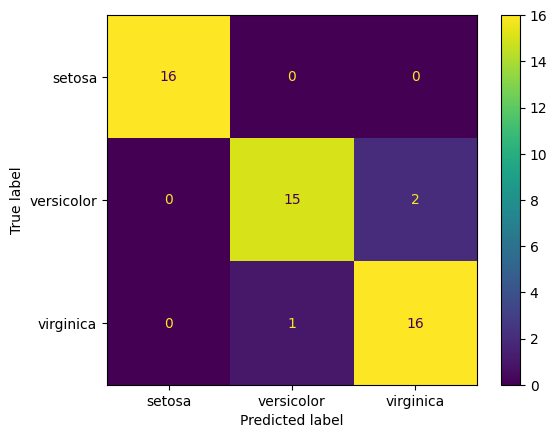

In [4]:
print ( (y_test==y_pred))
accuracy = 100* ( y_test == y_pred).sum() / y_test.shape[0]
print(f"Overall Accuracy = {accuracy} %")

confusionMatrix = np.zeros((3,3),int)
for i in range(50):
    actual = int(y_test[i])
    predicted = int(y_pred[i])
    confusionMatrix[actual][predicted] += 1
print(confusionMatrix)

#and here's sklearn's built-in method
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels= iris_names )

## Visualising 1-NN if we just learn from the petal features

Overall Accuracy in 2D = 96.0 %


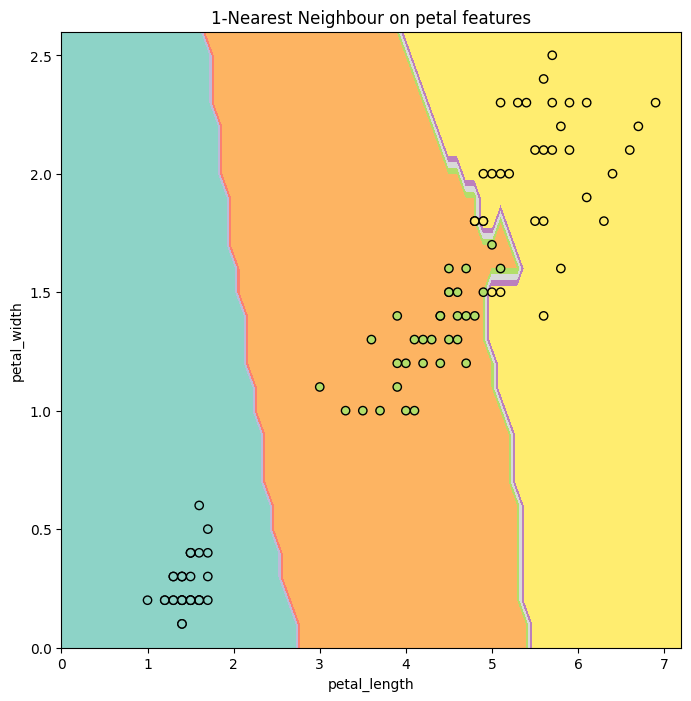

In [5]:
petals = X_train[:,2:4]
myKNNmodel.fit(petals,y_train)
y_pred = myKNNmodel.predict(X_test[:,2:4])
accuracy = 100* ( y_test == y_pred).sum() / y_test.shape[0]
print(f"Overall Accuracy in 2D = {accuracy} %")
W7utils.PlotDecisionSurface(petals,y_train,myKNNmodel, "1-Nearest Neighbour on petal features", iris_features[2:4],minZero=True,stepSize= 0.1)

# Timeout

# Rule Induction Algorithms

## Principles

### Rule Representation
In Topic One we looked at 'Knowledge-Based systems'  
where **humans provided the rules** for a situation.
<img src="figures/rule-representation.png" style="float:right" width=50%>


In supervised learning we are interested in how we can make   
**machines learn the rules** for an application.   
- e.g. **if** feature_n > threshold **then** prediction.

To do that we need to have:
1. A representation for rules  
2. A way of assigning "goodness" to (sets of) rules.
3. A way of algorithmically generating possible rules  
   We have fixed sets of features,operators,outputs,  
   We can **discretize** the thresholds for each feature    
   So we can use nested loops to create all possible rules.

   
### Rule Matching
We say that a rule *covers* a training example (features, label) if
- the example features meet the rule's _condition_
- the rule's _action_ (prediction) matches the example's label.   

### Decision Boundaries and Default Classes
Most existing algorithms tend to use  rules built up of lots of axis-perpendicular decisions.   
-  For example the (useless) rule  *If( petal_length > 0.3) THEN ("Setosa")*   
  Draws a line through feature space, at right angles to the petal_length axis, crossing it at 0.3.  
  Puts the label "setosa" on one side, nothing on the other

- As more rules are added, the model effectively builds labelled (hyper) boxes in space.  
  
- Rest of 'decision space' is given with the default (majority) label


## Greedy rule induction: keep choosing the next best rule

We can exploit the ability to generate rules algorithmically to make a simple Machine Learning algorithm that **automatically** learns rules, using a greedy constructive hill climbing approach:  

This is a **generate-and-test** approaich for search the space of all possible models, that repeatedly takes the "next-best" rule to create a rule-set.     
- Note that this method can be easily out-perfomed by more sophisticted approaches.
We start by making a copy of the training set: call this the _NotCovered_ data.  
Then in a loop until the NotCovered data is empty, or we cannot add any rules that don't make errors:
1. __Generate__ all the possible rules as described above
2. __Test__ how how many examples from  the _NotCovered_ data each rule covers
3. __Select__  the one that  covers the most un-covered examples **without making any wrong predictions**
   - add the new rule to our model
   - remove the examples that rule covered from the set of _NotCovered_ data


## Pseudocode
While it is being trained, the model holds:
- _ruleset_: a set of rules (initially empty)
- _NotCovered_ : a set of training examples
- a default class

**Note that a set of rules may not cover every training example**
 - because it may not be possible without making wrong predictions
 - or we may choose to limit the number of rules for simplicity or explainability
 

### Main Learning loop  - equivalent of fit()
```
function GreedyRuleInduction:  
    #step 0.
    Preprocess (trainingset)  
    SET model.ruleSet = empty ruleset
    SET notCovered = Copy(trainingset)
    SET default_prediction= GetMajorityClass(notCovered)

    #Main loop
    SET Improved=TRUE
    WHILE ( Size(notCovered)>0  AND Size(model.ruleSet) < MaxRules  AND Improved) DO  
        # set up
        SET Improved= FALSE
        SET bestNewRule = [] # empty rule
        SET coveredByBest = [] # emptyset
        
        #loop to test new rule
        FOR newRule in  (all_possible_rules)  # 4 nested for-loops to create the newrule
            covered = GetExamplesCoveredBy(newRule, notCovered)
            IF ( SIZE(covered) > SIZE(coveredByBest) ) THEN
                SET coveredByBest= covered
                SET bestNewRule = newRule
                SET Improved=TRUE
                
        #add best rule if found
        IF (Improved) THEN
            SET notCovered = notCovered / coveredByBest.  #set exclusion operation
            SET ruleset = ruleset + bestNewRule
    RETURN ruleset
```

### Useful helper function
```
function GetExamplesCoveredBy(newRule, notCovered):
    # assumes a rule is a tuple of [ feature,operator, threshold,prediction]
    # and that an example is a tuple of [featureValues, label]
    SET errors = FALSE
    SET covered = emptyset
    
    FOR (example in notCovered) DO
       IF MeetsConditions(example, rule) THEN
          IF example.label EQUALS rule.prediction THEN
              SET covered = covered + example
          ELSE
            SET errors = TRUE
            BREAK
            
    IF (errors EQUALS TRUE)
       return emptyset
       
    ELSE
       return covered
       
```
    
            

### test if a rule applies to an example
```
function MeetsConditions(example, rule)
   SET matches=FALSE
   SET feature= rule.feature
   SET operator = rule.operator
   SET threshold= rule.threshold
   
   set exampleValue= example.featureValues[feature]
   IF (operator IS Equals) THEN
      IF (exampleValue EQUALS threshold) THEN
           SET matches = TRUE
   ELSEIF (operator IS LessThan) THEN
      IF (exampleValue < threshold) THEN
          SET matches = TRUE
   ELSEIF (operator IS MoreThan) THEN
      IF  (exampleValue > threshold) THEN
           SET matches = TRUE

   #could extend to <= etc
  
   RETURN matches
```
   

### apply learned ruleset to make prediction
```
function makePrediction(example,ruleset)
    SET prediction= default_prediction
    
    FOR (rule in ruleset) DO
        IF MeetsConditions( example,rule) THEN
           SET prediction= rule.prediction
           BREAK
    return prediction
```


# Flow chart for model learning
<img src="figures/rule-induction-flowchart-fit-v2.png">

# Flowchart for predicting with model
<img src="figures/rule-induction-flowchart-predict.png">

## Timeout

## Decision Trees 
Tree-based structure can capture rules and more.

Basic idea: divide input space using a set of axis-parallel lines by **"growing"** a tree

1. Start with single node that predicts majority class label.
2. Recursively:
 1. measure the "data purity"  or "information content"  of the data that arrives at that node
 2. examine each way of splitting data  you could put into that node, and measure the information content of the left and right child nodes you would get from the split
 4. if the  "best" split is above some threshold then add it and repeat
 
**This criteria for adding nodes is different to the rule induction algorithm, and gives you different trees**

**Interior nodes** are equivalent to conditions in a rule  
**Leaf Nodes** are the outputs: 
 - class labels (classification tree), or 
 - equation for predicting values (regression tree)


## Decision trees for our example datasets
using code from sklearn 
`class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)`

Like all sklearn models it implements a fit() and predict() method

Note the default criteria for splitting is the 'gini' indes = there are many available, this is a popular one


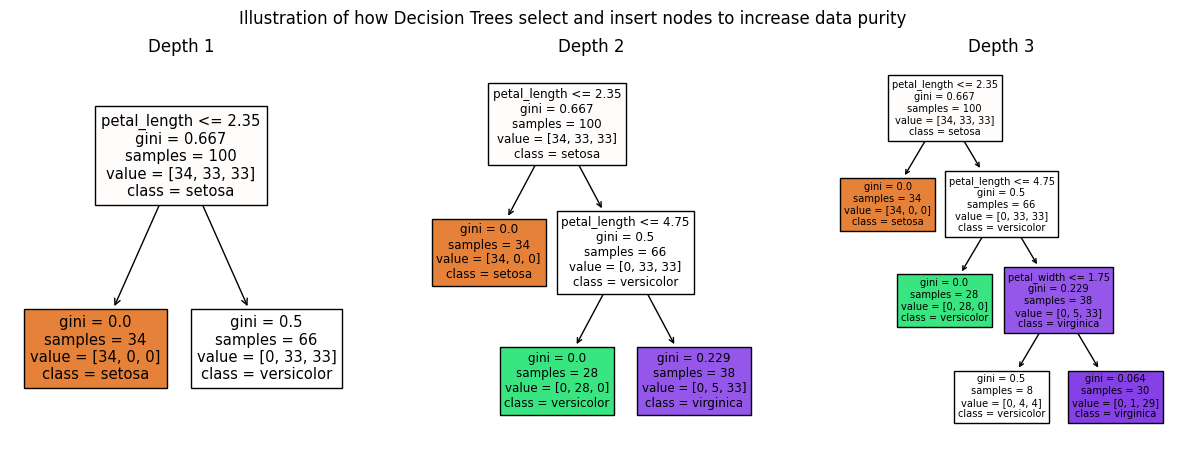

In [6]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

fig,ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Illustration of how Decision Trees select and insert nodes to increase data purity")
for depth in range (1,4):
    DTmodel = DecisionTreeClassifier(random_state=1234, max_depth=depth,min_samples_split=2,min_samples_leaf=1)
    DTmodel.fit(X_train,y_train)
    _ = tree.plot_tree(DTmodel, feature_names=iris_features, class_names= iris_names,filled=True,ax=ax[depth-1])
    ax[depth-1].set_title("Depth "+str(depth))

## Visualising the results using just the petal features

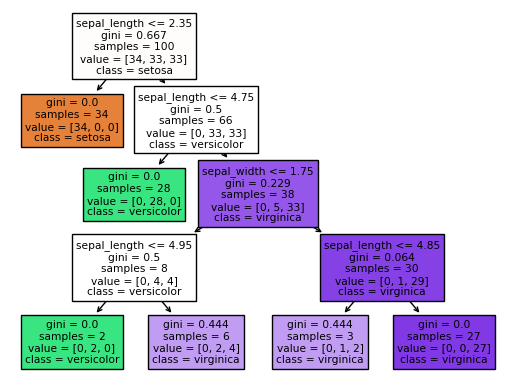

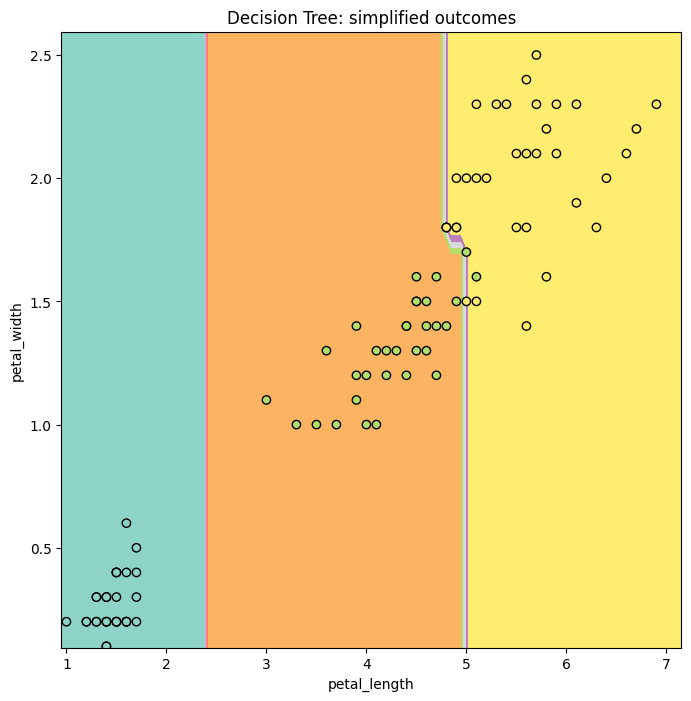

In [7]:
petals = X_train[:,2:4]
Two_D_DecisionTree = DecisionTreeClassifier(max_depth=4)
Two_D_DecisionTree.fit(petals,y_train)
_ = tree.plot_tree(Two_D_DecisionTree, feature_names=iris_features, class_names= iris_names,filled=True)

W7utils.PlotDecisionSurface(petals,y_train,Two_D_DecisionTree, "Decision Tree: simplified outcomes", iris_features[2:4],stepSize=0.1)

## So how do  we learn models?
**Construction**:  add boundaries to make models more complex
- Add examples to kNN
- Repeatedly add nodes to trees, splitting on new variables
- Repeatedly add rules that classify as-yet unclassified data
- Add nodes to an artifical neural network
 
**Perturbation**: Move existing boundaries to change model
- Change value of K or distance function in kNN
- Change rule/treenode thresholds: *if  exam < 40*  &rarr; *if exam < 38*
- Change operators in rules/ tree nodes:  *if exam < 38* &rarr; *if exam &leq; 38*
- Change variables considered in rules/tree nodes: *if exam < 38* &rarr; *if coursework < 38*
- Change weights in MLP, 


## Summary
Supervised Machine Learning is concerned with learning predictive models from datasets
- Different algorithms use different representations of decision boundaries
- Regions inside the boundaries contain **Class labels** or **(formulas leading to) continuous values** (regression)

Algorithms **fit** models to data by repeatedly:
  - making and testing small changes,  
  - and then selecting the ones that improve accuracy on the training set
  - until some stop criteria is met

  - They do this by either adding complexity or changing the parameters of an existing model
  - This is equivalent to moving through “model space”

Once the model has been learned (fit) we leave it unchanged  
  - and use it to **predict** the labels for new data points

Next week:   Neural Networks
